# Assignment 3

Nurul Tyas Rahmadani

PYTN050ONL008

Data Preparation

Import semua library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

Load Dataset

In [2]:
# Load Data Set
df_bank = pd.read_csv('./dataset/bank/bank-additional.csv',sep=";")
print ('Data read into a pandas dataframe!')
df_bank

Data read into a pandas dataframe!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Melihat 5 baris teratas dataset

In [3]:
# View top 5 rows dataset
df_bank_top5 = df_bank.head(5)
df_bank_top5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Melihat 5 baris terbawah dataset

In [4]:
# View bottom 5 rows dataset
df_bank_tail5 = df_bank.tail(5)
df_bank_tail5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


Mengetahui ukuran dataset

In [5]:
# Shape of dataset
df_bank_shape = df_bank.shape
df_bank_shape

(4119, 21)

Mengetahui info mengenai type masing-masing kolom pada dataset

In [6]:
# Info dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Mengetahui ada tidaknya missing value

In [7]:
missing = df_bank.isnull().sum()/len(df_bank)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_bank.isnull().sum()[df_bank.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


Daftar kolom yang akan diubah menjadi kategorical

In [8]:
list_column_categorical = ['job marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'y']

Konversi dulu data y yang berupa 'yes' dan 'no' menjadi numerik 0 dan 1. agar lebih mudah saat perhitungan/prediksi

In [9]:
from sklearn.preprocessing import LabelEncoder
y = df_bank['y'].values
print('data y sebelum konversi: ',y)
label_y_encoder = LabelEncoder().fit(y)
y_konversi = label_y_encoder.transform(y)
print('data y setelah konversi: ',y_konversi)
print('class before transform: ',label_y_encoder.classes_)

data y sebelum konversi:  ['no' 'no' 'no' ... 'no' 'no' 'no']
data y setelah konversi:  [0 0 0 ... 0 0 0]
class before transform:  ['no' 'yes']


Konversi dulu data feature ke bentuk numerik jika datanya masih kategorikal (konversi seperti data y)

Data feature yang akan digunakan adalah data age dan data job. untuk age karena sudah numerik tidak perlu di konversi lagi

In [10]:
data_1 = df_bank['job'].values
print('data feature 1 sebelum konversi: ',data_1)
label_data1_encoder = LabelEncoder().fit(data_1)
data_1_konversi = label_data1_encoder.transform(data_1)
print('data feature 1 setelah konversi: ',data_1_konversi)
print('class before transform: ',label_data1_encoder.classes_)

data feature 1 sebelum konversi:  ['blue-collar' 'services' 'services' ... 'student' 'admin.' 'management']
data feature 1 setelah konversi:  [1 7 7 ... 8 0 4]
class before transform:  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [11]:
#data_2 = df_bank['marital'].values
#print('data feature 2 sebelum konversi: ',data_2)
#label_data2_encoder = LabelEncoder().fit(data_2)
#data_2_konversi = label_data2_encoder.transform(data_2)
#print('data feature 2 setelah konversi: ',data_2_konversi)
#print('class before transform: ',label_data2_encoder.classes_)

Proses penambahan kolom pada data frame df_bank

In [12]:
df_bank['y_konversi'] = y_konversi
df_bank['data1_konversi'] = data_1_konversi
#df_bank['data2_konversi'] = data_2_konversi
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_konversi,data1_konversi
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,7
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,7
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,7
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0


Proses pengaturan data dan untuk mengetahui shape data

In [13]:
data_feature_bank = df_bank[['age','data1_konversi']].values
#data_feature_bank = df_bank[['age','data1_konversi','data2_konversi']].values
print('data feature:',data_feature_bank )
print('shape data feature:',data_feature_bank.shape )

target_y_konversi = df_bank[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data feature: [[30  1]
 [39  7]
 [25  7]
 ...
 [27  8]
 [58  0]
 [34  4]]
shape data feature: (4119, 2)
data y: [0 0 0 ... 0 0 0]
shape data y: (4119,)


Proses pemodelan :
    menentukan k atau neighbors
    input data feature bank dan target y

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model_ykonv = KNeighborsClassifier(n_neighbors=5).fit(data_feature_bank,target_y_konversi)
model_ykonv

KNeighborsClassifier()

Hasil rediksi dari model y yang sudah diperoleh

In [15]:
prediksi_ykonv = model_ykonv.predict(data_feature_bank)
prediksi_ykonv

array([0, 0, 0, ..., 0, 0, 0])

Menentukan performance model dengan melihat nilai score

In [16]:
performance_model = model_ykonv.score(data_feature_bank,target_y_konversi)
print('performance model : ',performance_model)

performance model :  0.8922068463219228


proses looping untuk meningkatkan nilai neighbors dan mencari nilai neighbors yang optimal

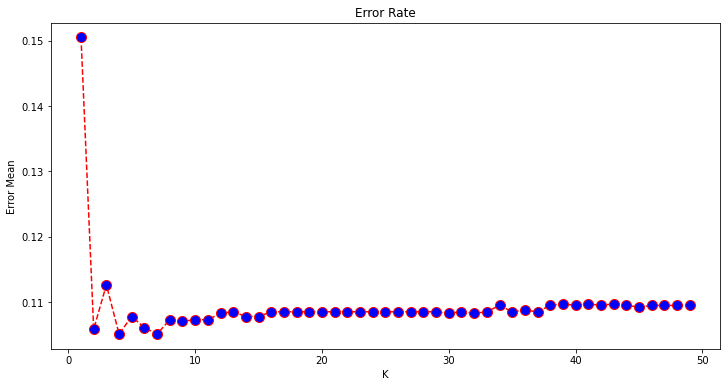

In [17]:
error = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_loop = KNeighborsClassifier(n_neighbors=x).fit(data_feature_bank,target_y_konversi)
    prediksi_ykonv_loop = model_ykonv_loop.predict(data_feature_bank)
    error.append(np.mean(prediksi_ykonv_loop!=target_y_konversi))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error, color = 'red', linestyle = 'dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

dari grafik tersebut diperoleh nilai error yang paling kecil di neighbor = 4. Sehingga jika nilai neighbor =4, maka nilai performance model (score) akan meningkat.